In [1]:
import sys
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb


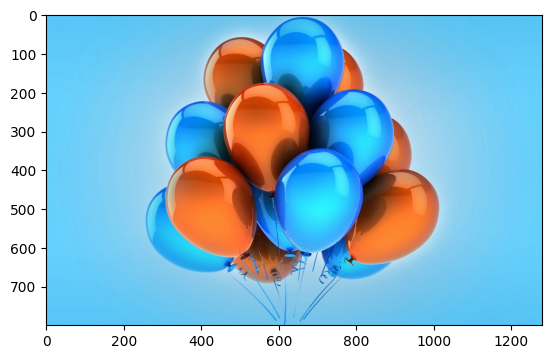

In [2]:
input_image = cv.imread('input.jpg')
plt.imshow(input_image)

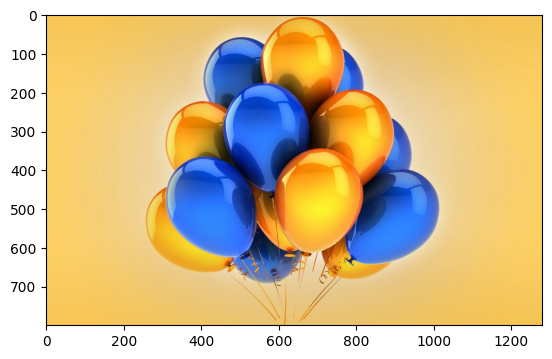

In [4]:
image = input_image
image_rgb = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)

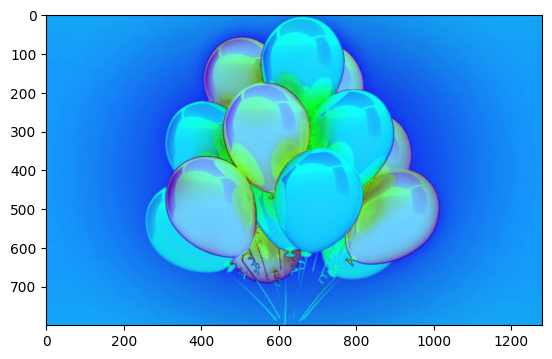

In [6]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
plt.imshow(image_hsv)

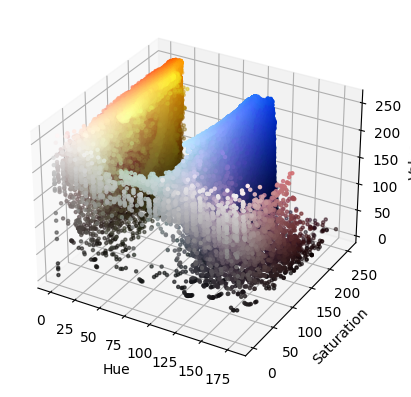

In [7]:
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

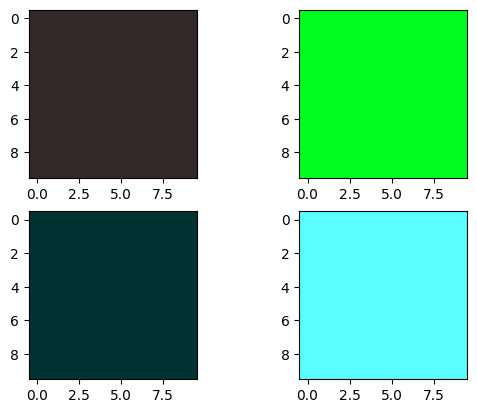

In [8]:
lower_blue = (0,50,50)
upper_blue =(90,255,255)
lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0

plt.subplot(2, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(2, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(2, 2, 3)
plt.imshow(lo_square)
plt.subplot(2, 2, 4)
plt.imshow(do_square)
plt.show()

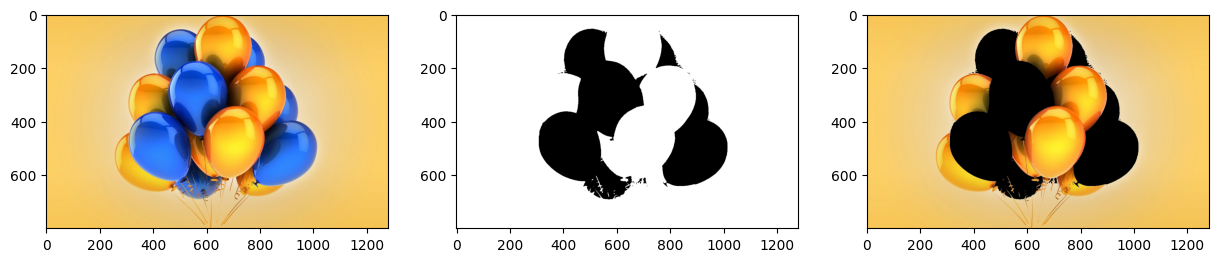

In [9]:
mask = cv.inRange(image_hsv, lower_blue, upper_blue)
result = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show()

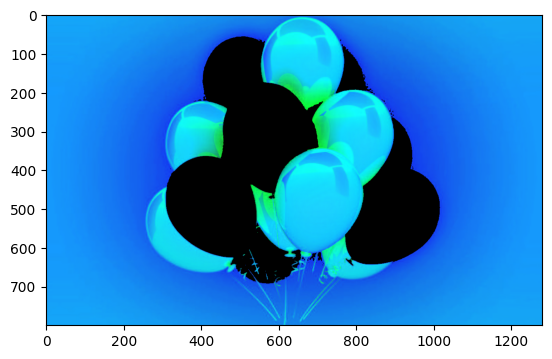

In [10]:
image_hsv = cv.cvtColor(result, cv.COLOR_RGB2HSV)
plt.imshow(image_hsv)

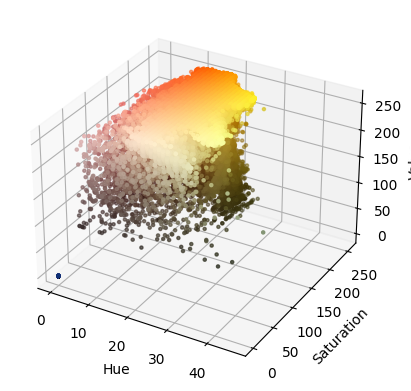

In [11]:
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

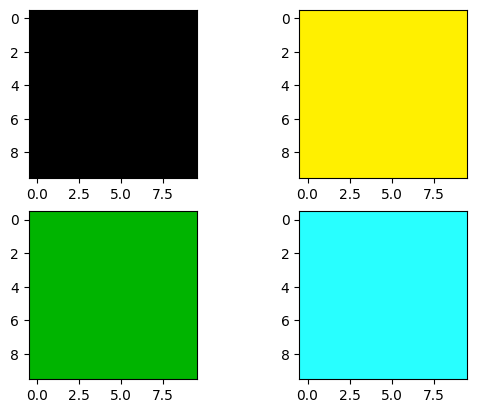

In [49]:
lower_blue = (0,180,0)
upper_blue =(40,255,255)
lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0

plt.subplot(2, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(2, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(2, 2, 3)
plt.imshow(lo_square)
plt.subplot(2, 2, 4)
plt.imshow(do_square)
plt.show()

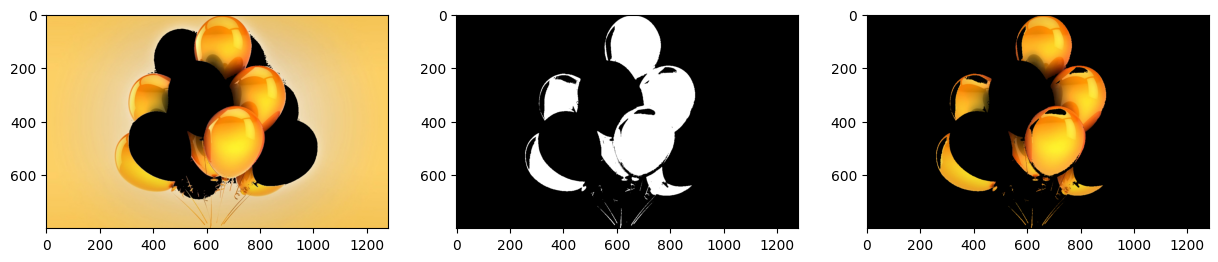

In [67]:
mask = cv.inRange(image_hsv, lower_blue, upper_blue)
result_two = cv.bitwise_and(result, result, mask=mask)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(result)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result_two)
plt.show()

In [72]:
x,y,channels = result_two.shape
converted_image = np.zeros((x,y,channels),dtype=np.uint8)
converted_image[:, :, 0] = np.where(result_two[:, :, 0] <1,255, result_two[:, :, 0])
converted_image[:, :, 1] = np.where(result_two[:, :, 1] <1,255, result_two[:, :, 1])
converted_image[:, :, 2] = np.where(result_two[:, :, 2] <1,255, result_two[:, :, 2])

(800, 1280, 3)


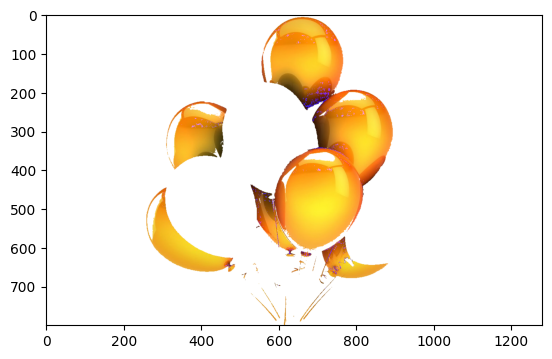

In [75]:

print(converted_image.shape)
plt.imshow(converted_image)
plt.show()

In [76]:
cv.imwrite("result.jpg", converted_image)

True